# assignment_8_2

### Convert the IMF Direction of Trade Statistics 2020M1 (i.e., Jan 2020) and 2021M1 (i.e., Jan 2021) Excel Data to csv

In [1]:
#importing pandas as pd
import pandas as pd
  
# Read and store content
# of an excel file 
trade_older = pd.read_excel ("../assignment_8_data/export_2020m1.xlsx", skiprows=1, index_col=0, nrows=7)
  
# Write the dataframe object
# into csv file
trade_older.to_csv ("export_2020m1.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("export_2020m1.csv"))
  
# show the dataframe
#df

In [2]:
#importing pandas as pd
import pandas as pd
  
# Read and store content
# of an excel file 
trade_latest = pd.read_excel ("../assignment_8_data/export_2021m1.xlsx", skiprows=1, index_col=0, nrows=7)
  
# Write the dataframe object
# into csv file
trade_latest.to_csv ("export_2021m1.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("export_2021m1.csv"))
  
# show the dataframe
#df
trade_latest

,Canada,France,Germany,Italy,Japan,United Kingdom,United States
Canada,NaN,182.352251,415.434050,181.372819,800.140783,1524.279961,26703.649930
France,295.809053,NaN,6499.882449,3609.601611,671.496776,2212.457674,3008.172497
Germany,765.305670,9564.520318,NaN,6580.061189,1804.535371,5353.747032,10348.494982
Italy,331.691543,4508.622422,5843.193709,NaN,687.903268,1543.974658,3610.256816
Japan,664.301920,525.365888,1515.356257,365.072103,NaN,875.286681,10645.095673
United Kingdom,370.041409,1568.474303,2563.928364,749.513129,588.939467,NaN,4036.455558
United States,21217.187629,1996.406425,4516.721760,1815.032006,6017.644718,4670.679914,NaN


In [3]:
trade_latest.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

### Create network

In [4]:
trade_latest = pd.melt(trade_latest.reset_index(), id_vars='index')
trade_latest.columns = ['export_country', 'import_country', 'value']
trade_latest.head()

,export_country,import_country,value
0,Canada,Canada,NaN
1,France,Canada,295.809053
2,Germany,Canada,765.305670
3,Italy,Canada,331.691543
4,Japan,Canada,664.301920


In [5]:
trade_latest.dropna(inplace=True)
trade_latest.head()

,export_country,import_country,value
1,France,Canada,295.809053
2,Germany,Canada,765.305670
3,Italy,Canada,331.691543
4,Japan,Canada,664.301920
5,United Kingdom,Canada,370.041409


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for index, row in trade_latest.iterrows():
    G.add_edge(row['export_country'], row['import_country'], weight=row['value'])

# remove isolated vertives (if any)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)

# Setting size and colours
options = {
    'node_color': 'lightblue',
    'edge_color': 'lightblue',
    'node_size': 1,
    'width': 1,
    'alpha': 1.0}

In [7]:
# v2
import numpy as np

S = nx.DiGraph()

for index, row in trade_latest.iterrows():
    if row('export_country')=='United Kingdom':
        e_color='red'
    if row('export_country')=='United States':
        e_color='blue'
    if row('export_country')=='Canada':
        e_color='orange'
    else:
        e_color='grey'
        
    S.add_edge(row['export_country'],row['import_country'], weight=row['value'], color=e_color)

# remove isolated vertices (if any)
remove = [node for node,degree in G.degree() if degree == 0]
S.remove_nodes_from(remove)

# Setting size and colours
options = {
    'node_color': 'lightblue',
    'node_size': 1000,
    'connectionstyle': 'arc3, rad=0.1',
    'alpha': 1}

colors : nx.get_edge_attributes(S,'color').values()
    
weights = nx.get_edge_attributes(S,'weight').values()
weights = np.divide(list(weights),2500) #adjust weight so that line widths are appropriate

TypeError: 'Series' object is not callable

### Draw graph

NetworkXError: random_state_index is incorrect

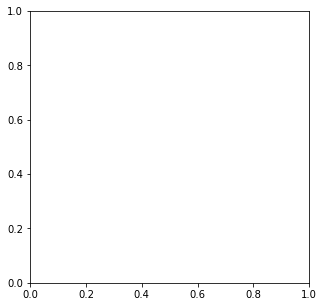

In [9]:
# spring layout

plt.subplots(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

NetworkXError: random_state_index is incorrect

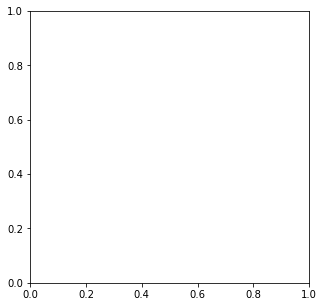

In [10]:
# spring layout v2
weights = nx.get_edge_attributes(S,'weight').values()
weights = np.divide(list(weights),2500) #adjust weight so that line widths are appropriate

plt.subplots(figsize=(5,5))
pos=nx.spring_layout(S)
nx.draw(S,pos=pos,font_size=9, width=weights, edge_color=colors,**options)
nx.draw_networkx_labels(S,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

NetworkXError: random_state_index is incorrect

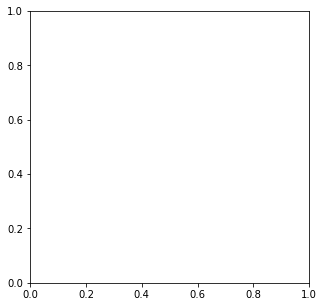

In [11]:
# random layout

plt.subplots(figsize=(5,5))
pos=nx.random_layout(G)
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

NetworkXError: random_state_index is incorrect

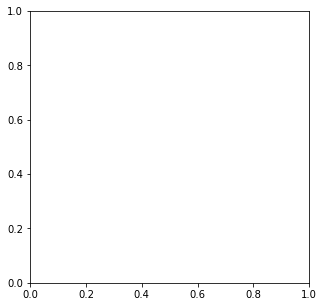

In [12]:
# random layout v2

plt.subplots(figsize=(5,5))
pos=nx.random_layout(G)
nx.draw(G,pos=pos,font_size=9, width=weights, edge_color=colors,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

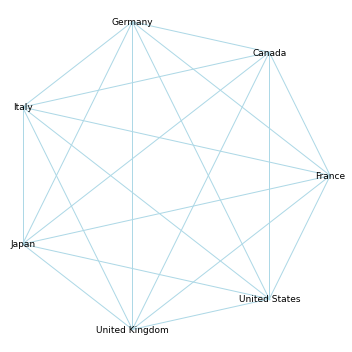

In [13]:
# circular layout

plt.subplots(figsize=(5,5))
pos=nx.circular_layout(G)
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

NameError: name 'colors' is not defined

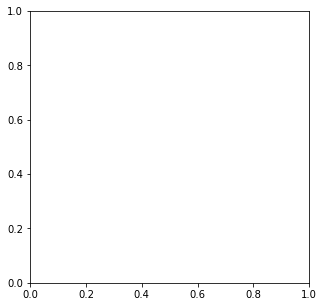

In [14]:
# circular layout v2
weights = nx.get_edge_attributes(S,'weight').values()
weights = np.divide(list(weights),2500) #adjust weight so that line widths are appropriate
colors : nx.get_edge_attributes(S,'color').values()

plt.subplots(figsize=(5,5))
pos=nx.circular_layout(S)
nx.draw(S,pos=pos,font_size=9, width=weights, edge_color=colors,**options)
nx.draw_networkx_labels(S,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

In [15]:
# Save network graph for next part of assignment

import pickle

f= open("graph_pickle_latest", "wb") # open file for writing in binary mode
pickle.dump(G, file=f)
f.close()

NameError: name 'x_colors' is not defined

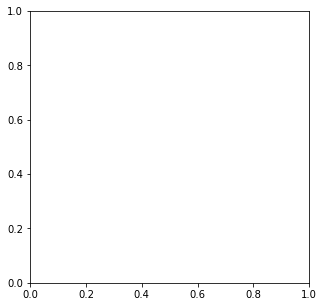

In [17]:
# try reloading saved network again

with open('graph_pickle_latest', 'rb') as f:
    x = pickle.load(f)
f.close()

x_weights = nx.get_edge_attributes(x,'weight').values()
x_weights = np.divide(list(x_weights),2500) #adjust weight so that line widths are appropriate
X_colors : nx.get_edge_attributes(x,'color').values()

plt.subplots(figsize=(5,5))
pos=nx.kamada_kawai_layout(x)
nx.draw(x,pos=pos,font_size=9,width=weights, edge_color=x_colors,**options)
nx.draw_networkx_labels(x,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()